In [136]:
import os
import math
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils_feature_engineering import *

# some settings for displaying Pandas results
pd.set_option('display.width', 2000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.precision', 4)
pd.set_option('display.max_colwidth', -1)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\2803809328.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


# 1. Load train and test data

In [137]:
path = r'D:\NEU\Năm 3\DATA PREP\PROJECT_DATAPREP\GITHUB REPO\dataset\dseb63_final_project_DP_dataset\\'
# train
application_train = pd.read_csv(path + 'dseb63_' + 'application_train.csv')
application_train.drop(columns='Unnamed: 0',inplace=True)
# test
application_test = pd.read_csv(path + 'dseb63_' + 'application_test.csv')
application_test.drop(columns='Unnamed: 0',inplace=True)

In [138]:
# filter by tvt code
application_tvt_extend = pd.read_pickle("application_tvt_extend.pkl", compression="bz2")
application_train_filtered = (application_tvt_extend.query("tvt_code == 'train'")
                      .merge(application_train[["SK_ID_CURR"]], on="SK_ID_CURR")
                      .drop(columns=["tvt_code"]))
application_train_filtered.head()

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,53466,0
4,27272,0


# 2. Replot the null situation of DataFrame

In [139]:
def check_missing_values(df):
    # Missing value percentage
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(
        df_null_percentage[df_null_percentage == 0].index).sort_values(ascending=False).reset_index()
    df_null_percentage.columns = ["Feature", "Null Percentage"]

    return df_null_percentage

train_null = check_missing_values(application_train)
train_null

,Feature,Null Percentage
0,COMMONAREA_MEDI,69.8877
1,COMMONAREA_AVG,69.8877
2,COMMONAREA_MODE,69.8877
3,NONLIVINGAPARTMENTS_MEDI,69.4564
4,NONLIVINGAPARTMENTS_MODE,69.4564
5,NONLIVINGAPARTMENTS_AVG,69.4564
6,FONDKAPREMONT_MODE,68.4068
7,LIVINGAPARTMENTS_MODE,68.3703
8,LIVINGAPARTMENTS_MEDI,68.3703
9,LIVINGAPARTMENTS_AVG,68.3703


In [140]:
test_null = check_missing_values(application_test)
test_null

,Feature,Null Percentage
0,COMMONAREA_MEDI,69.8107
1,COMMONAREA_AVG,69.8107
2,COMMONAREA_MODE,69.8107
3,NONLIVINGAPARTMENTS_MEDI,69.3392
4,NONLIVINGAPARTMENTS_MODE,69.3392
5,NONLIVINGAPARTMENTS_AVG,69.3392
6,FONDKAPREMONT_MODE,68.3035
7,LIVINGAPARTMENTS_MODE,68.2937
8,LIVINGAPARTMENTS_MEDI,68.2937
9,LIVINGAPARTMENTS_AVG,68.2937


In [170]:
application_train.dtypes.value_counts()

float64    72
int64      26
object     16
dtype: int64

In [141]:
# Check number of overlapped null columns in train and test
train_test_same_null_dict = {}

count_same = 0
count_diff = 0

for feat in test_null.Feature:
    if (feat in train_null.Feature.to_list()):
        count_same += 1
    else: 
        count_diff += 1
print(f"same : {count_same}\ndiff: {count_diff}")

same : 66
diff: 0


> Cột nào ở application train null thì ở application test cũng null 

### Data Cleaning

**Assesing FLAG_DOCUMENT COLUMNS**

In [142]:
flag_cols = []
for fname in application_train.columns.to_list() : 
    if fname.__contains__('FLAG_DOCUMENT'):
        flag_cols.append(fname)
flag_cols

['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [143]:
print('Data Value Survey on FLAG_DOCUMENT Columns')
for fname in flag_cols:
    display(application_train[fname].value_counts(normalize=True))
    print('-'*50)

Data Value Survey on FLAG_DOCUMENT Columns


0    9.9997e-01
1    3.2519e-05
Name: FLAG_DOCUMENT_2, dtype: float64

--------------------------------------------------


1    0.7099
0    0.2901
Name: FLAG_DOCUMENT_3, dtype: float64

--------------------------------------------------


0    9.9993e-01
1    7.3168e-05
Name: FLAG_DOCUMENT_4, dtype: float64

--------------------------------------------------


0    0.9848
1    0.0152
Name: FLAG_DOCUMENT_5, dtype: float64

--------------------------------------------------


0    0.912
1    0.088
Name: FLAG_DOCUMENT_6, dtype: float64

--------------------------------------------------


0    0.9998
1    0.0002
Name: FLAG_DOCUMENT_7, dtype: float64

--------------------------------------------------


0    0.9189
1    0.0811
Name: FLAG_DOCUMENT_8, dtype: float64

--------------------------------------------------


0    0.9961
1    0.0039
Name: FLAG_DOCUMENT_9, dtype: float64

--------------------------------------------------


0    9.9998e-01
1    1.6260e-05
Name: FLAG_DOCUMENT_10, dtype: float64

--------------------------------------------------


0    0.9961
1    0.0039
Name: FLAG_DOCUMENT_11, dtype: float64

--------------------------------------------------


0    1.0000e+00
1    4.0649e-06
Name: FLAG_DOCUMENT_12, dtype: float64

--------------------------------------------------


0    0.9965
1    0.0035
Name: FLAG_DOCUMENT_13, dtype: float64

--------------------------------------------------


0    0.9971
1    0.0029
Name: FLAG_DOCUMENT_14, dtype: float64

--------------------------------------------------


0    0.9988
1    0.0012
Name: FLAG_DOCUMENT_15, dtype: float64

--------------------------------------------------


0    0.99
1    0.01
Name: FLAG_DOCUMENT_16, dtype: float64

--------------------------------------------------


0    0.9998
1    0.0002
Name: FLAG_DOCUMENT_17, dtype: float64

--------------------------------------------------


0    0.9919
1    0.0081
Name: FLAG_DOCUMENT_18, dtype: float64

--------------------------------------------------


0    0.9994
1    0.0006
Name: FLAG_DOCUMENT_19, dtype: float64

--------------------------------------------------


0    0.9995
1    0.0005
Name: FLAG_DOCUMENT_20, dtype: float64

--------------------------------------------------


0    0.9997
1    0.0003
Name: FLAG_DOCUMENT_21, dtype: float64

--------------------------------------------------


In [144]:
#Most of FLAG_DOCUMENT features having just one category for almost all data, we will remove those with data 
flag_cols_to_keep = ["FLAG_DOCUMENT_3","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9"]
application_train.drop(columns=[col for col in flag_cols if col not in flag_cols_to_keep], inplace=True)
application_test.drop(columns=[col for col in flag_cols if col not in flag_cols_to_keep], inplace=True)

# 3. Preprocessing

## 3.1 Categorical columns

## NAME_TYPE_SUITE: Người đi cùng khi đi vay

In [145]:
application_train['NAME_TYPE_SUITE'].isna().sum()

1046

In [146]:
application_train['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      198742
Family             32146 
Spouse, partner    9109  
Children           2621  
Other_B            1412  
NaN                1046  
Other_A            713   
Group of people    220   
Name: NAME_TYPE_SUITE, dtype: int64

In [147]:
# Có 1046 giá trị null, vì đa số là Unacoopanied, nên sẽ fillna là Unaccompanied
application_train['NAME_TYPE_SUITE'].fillna(value = application_train['NAME_TYPE_SUITE'].mode()[0], inplace=True)
application_test['NAME_TYPE_SUITE'].fillna(value=application_test['NAME_TYPE_SUITE'].mode()[0], inplace=True)

In [148]:
application_train['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      199788
Family             32146 
Spouse, partner    9109  
Children           2621  
Other_B            1412  
Other_A            713   
Group of people    220   
Name: NAME_TYPE_SUITE, dtype: int64

In [149]:
# filting categorical_columns with XNA
categorical_columns = application_train.dtypes[application_train.dtypes == 'object'].index.tolist()
application_train[categorical_columns] = application_train[categorical_columns].fillna('XNA')
application_test[categorical_columns] = application_test[categorical_columns].fillna('XNA')

## 3.2 Numerical Columns

## OWN_CAR_AGE: Tuổi thọ của xe

In [150]:
application_train['OWN_CAR_AGE'].isna().mean()

0.6592766931291132

In [151]:
application_train[(application_train['OWN_CAR_AGE'].isna()) & (application_train['FLAG_OWN_CAR'] == 'Y')]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
24748,0,Cash loans,M,Y,N,1,495000.0,1006920.0,45630.0,900000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.0308,-16030,-1889,-10088.0,-4879,NaN,1,1,1,1,0,0,Managers,2.0,2,2,TUESDAY,16,0,0,0,0,0,0,Construction,0.3393,0.6632,0.1455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XNA,XNA,NaN,XNA,XNA,0.0,0.0,0.0,0.0,-1477.0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,260868
173933,0,Cash loans,M,Y,N,0,225000.0,900000.0,26446.5,900000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.0313,-13502,-2256,-2256.0,-5413,NaN,1,1,1,1,1,0,Drivers,2.0,2,2,FRIDAY,8,0,0,0,0,0,0,Advertising,0.3788,0.6067,0.4101,0.0619,0.0364,0.9742,NaN,NaN,0.0,0.1034,0.1667,NaN,0.0617,NaN,0.0479,NaN,0.0,0.063,0.0377,0.9742,NaN,NaN,0.0,0.1034,0.1667,NaN,0.0631,NaN,0.0499,NaN,0.0,0.0625,0.0364,0.9742,NaN,NaN,0.0,0.1034,0.1667,NaN,0.0628,NaN,0.0488,NaN,0.0,XNA,block of flats,0.0394,Panel,No,1.0,0.0,1.0,0.0,-59.0,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,5.0,197987
183782,0,Cash loans,F,Y,Y,1,225000.0,518562.0,25078.5,463500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.0202,-13021,-944,-1047.0,-4107,NaN,1,1,0,1,0,0,Accountants,3.0,3,3,MONDAY,10,0,0,0,0,0,0,Self-employed,0.6858,0.5846,0.2707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XNA,XNA,NaN,XNA,XNA,1.0,0.0,1.0,0.0,-668.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0,114783
189441,0,Cash loans,F,Y,Y,0,225000.0,233833.5,26577.0,211500.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.0188,-10573,-180,-4143.0,-3246,NaN,1,1,0,1,0,0,XNA,2.0,2,2,MONDAY,17,0,0,0,1,1,0,Other,0.3537,0.6086,0.4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XNA,XNA,

In [152]:
# OWN_CAR_AGE bị để trống do người đi vay không sở hữu xe ô tô
application_train[(application_train['OWN_CAR_AGE'].isna())
                  & (application_train['FLAG_OWN_CAR'] == 'N')]

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_3,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.0035,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.3113,0.6222,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.0790,0.0554,0.0,0.0000,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.0080,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.6504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XNA,XNA,NaN,XNA,XNA,2.0,0.0,2.0,0.0,-617.0,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.0287,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.3227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XNA,XNA,NaN,XNA,XNA,0.0,0.0,0.0,0.0,-1106.0,0,0,0,1,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.0358,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,NaN,0.3542,0.6212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [153]:
# 65% không điền thông tin, những người không có xe thì sẽ không điền, nên fillna là 0
application_train['OWN_CAR_AGE'].fillna(value = 0, inplace=True)
application_test['OWN_CAR_AGE'].fillna(value = 0, inplace=True)

# 4. Feature Engineering

## Binary vs one-hot encoder features

In [154]:
import re
def gen_binary_one_hot_feat(df_input):
    
    '''
    Function to generate binary and one-hot encoded features from a pandas dataframe.

    Inputs:
        df_input: A pandas dataframe containing the data to be encoded. This dataframe
                should have columns with categorical features.

    Returns:
        A new pandas dataframe with the following additions:
            * Binary encoded features: These features are named with the prefix "is_"
            followed by the original feature name. They have values of 1 if the original
            feature value matches the default value specified in the `dict_feat` dictionary,
            and 0 otherwise.
            * One-hot encoded features: These features have names constructed by adding
            underscores to the original feature name and replacing non-alphanumeric characters.
            They have values of 1 if the original feature value matches the corresponding
            category, and 0 otherwise.
            * Original ID column: The dataframe will also keep the original ID column
            (usually named `SK_ID_CURR`).
    '''

    df_data = df_input.copy()
    select_features = []


    dict_feat = {
        "binary_default": {
            "NAME_CONTRACT_TYPE": ['Cash loans', 'Revolving loans'],
            "CODE_GENDER": ['M', 'F', 'XNA'],
            "FLAG_OWN_CAR": ['Y', 'N'],
            "FLAG_OWN_REALTY": ['Y', 'N'],
            "EMERGENCYSTATE_MODE": ['Yes', 'No'],
        },\
        "binary": [
            "FLAG_EMP_PHONE",
            "FLAG_WORK_PHONE",
            "FLAG_PHONE",
            "FLAG_EMAIL",
            "REG_REGION_NOT_LIVE_REGION",
            "REG_REGION_NOT_WORK_REGION",
            "LIVE_REGION_NOT_WORK_REGION",
            "REG_CITY_NOT_WORK_CITY",
            "LIVE_CITY_NOT_WORK_CITY",
            "FLAG_DOCUMENT_3",
            "FLAG_DOCUMENT_5",
            "FLAG_DOCUMENT_6",
            "FLAG_DOCUMENT_8",
            "FLAG_DOCUMENT_9",
            "REGION_RATING_CLIENT",
            "REGION_RATING_CLIENT_W_CITY",
        ],\
        "onehot": {
            "NAME_TYPE_SUITE": ["Unaccompanied", "Family", "Spouse, partner", "Children", "Other_A", "Other_B", "Group of people"],
            "NAME_INCOME_TYPE": ["Working", "State servant", "Commercial associate", "Pensioner", "Unemployed", "Student", "Businessman", "Maternity leave"],
            "NAME_EDUCATION_TYPE": ["Secondary / secondary special", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"],
            "NAME_FAMILY_STATUS": ["Single / not married", "Married", "Civil marriage", "Widow", "Separated", "Unknown"],
            "NAME_HOUSING_TYPE": ["House / apartment", "Rented apartment", "With parents", "Municipal apartment", "Office apartment", "Co-op apartment"],
            "OCCUPATION_TYPE": ["Laborers", "Core staff", "Accountants", "Managers", "Drivers", "Sales staff", "Cleaning staff", "Cooking staff", "Private service staff", "Medicine staff", "Security staff", "High skill tech staff", "Waiters/barmen staff", "Low-skill Laborers", "Realty agents", "Secretaries", "IT staff", "HR staff"],
            "ORGANIZATION_TYPE": ["Business Entity Type 3", "School", "Government", "Religion", "Other", "XNA", "Electricity", "Medicine", "Business Entity Type 2", "Self-employed", "Transport: type 2", "Construction", "Housing", "Kindergarten", "Trade: type 7", "Industry: type 11", "Military", "Services", "Security Ministries", "Transport: type 4", "Industry: type 1", "Emergency", "Security", "Trade: type 2", "University", "Transport: type 3", "Police", "Business Entity Type 1", "Postal", "Industry: type 4", "Agriculture", "Restaurant", "Culture", "Hotel", "Industry: type 7", "Trade: type 3", "Industry: type 3", "Bank", "Industry: type 9", "Insurance", "Trade: type 6", "Industry: type 2", "Transport: type 1", "Industry: type 12", "Mobile", "Trade: type 1", "Industry: type 5", "Industry: type 10", "Legal Services", "Advertising", "Trade: type 5", "Cleaning", "Industry: type 13", "Trade: type 4", "Telecom", "Industry: type 8", "Realtor", "Industry: type 6"],
            "FONDKAPREMONT_MODE": ["reg oper account", "org spec account", "reg oper spec account", "not specified"],
            "HOUSETYPE_MODE": ["block of flats", "terraced house", "specific housing"],
            "WALLSMATERIAL_MODE": ["Stone, brick", "Block", "Panel", "Mixed", "Wooden", "Others", "Monolithic"],            
        }
    }

    for key in dict_feat:
        if key == 'binary_default':
            for col_name in dict_feat[key]:
                # get default value
                default_val = dict_feat[key][col_name][0]

                # encode categorical name to binary
                feat_name = 'is_' + col_name
                select_features.append(feat_name)
                df_data[feat_name] = df_data[col_name].apply(lambda x: int(x == default_val))
        
        elif key == 'binary':
            for col_name in dict_feat[key]:
                feat_name = 'is_' + col_name
                select_features.append(feat_name)
                df_data[feat_name] = df_data[col_name]
        
        elif key == 'onehot':
            for col_name in dict_feat[key]:
                list_vals = dict_feat[key][col_name]
                for val in list_vals:
                    try:
                        modified_val_name = re.sub(r'[^0-9a-zA-Z]', '_', val)
                        new_name = "{}_{}".format(col_name, modified_val_name)
                        
                        select_features.append(new_name)
                        df_data[new_name] = df_data[col_name].apply(lambda x : int(x == val))
                    
                    except Exception as err:
                        print("One hot for {}-{}. Error: {}".format(col_name, val, err))

    return df_data[['SK_ID_CURR'] + select_features]

In [155]:
# for train feat
train_cat_baseline = gen_binary_one_hot_feat(application_train)

# for test feat
test_cat_baseline = gen_binary_one_hot_feat(application_test)

# print results
print(train_cat_baseline.shape, test_cat_baseline.shape)

C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data[new_name] = df_data[col_name].apply(lambda x : int(x == val))
C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data[new_name] = df_data[col_name].apply(lambda x : int(x == val))
C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

(246009, 144) (61502, 144)


C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data[new_name] = df_data[col_name].apply(lambda x : int(x == val))
C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_data[new_name] = df_data[col_name].apply(lambda x : int(x == val))
C:\Users\Hải Nam\AppData\Local\Temp\ipykernel_28444\3356107393.py:95: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `

In [156]:
train_cat_baseline

,SK_ID_CURR,is_NAME_CONTRACT_TYPE,is_CODE_GENDER,is_FLAG_OWN_CAR,is_FLAG_OWN_REALTY,is_EMERGENCYSTATE_MODE,is_FLAG_EMP_PHONE,is_FLAG_WORK_PHONE,is_FLAG_PHONE,is_FLAG_EMAIL,is_REG_REGION_NOT_LIVE_REGION,is_REG_REGION_NOT_WORK_REGION,is_LIVE_REGION_NOT_WORK_REGION,is_REG_CITY_NOT_WORK_CITY,is_LIVE_CITY_NOT_WORK_CITY,is_FLAG_DOCUMENT_3,is_FLAG_DOCUMENT_5,is_FLAG_DOCUMENT_6,is_FLAG_DOCUMENT_8,is_FLAG_DOCUMENT_9,is_REGION_RATING_CLIENT,is_REGION_RATING_CLIENT_W_CITY,NAME_TYPE_SUITE_Unaccompanied,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Spouse__partner,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,NAME_TYPE_SUITE_Group_of_people,NAME_INCOME_TYPE_Working,NAME_INCOME_TYPE_State_servant,NAME_INCOME_TYPE_Commercial_associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Maternity_leave,NAME_EDUCATION_TYPE_Secondary___secondary_special,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,NAME_EDUCATION_TYPE_Academic_degree,NAME_FAMILY_STATUS_Single___not_married,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Civil_marriage,NAME_FAMILY_STATUS_Widow,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Unknown,NAME_HOUSING_TYPE_House___apartment,NAME_HOUSING_TYPE_Rented_apartment,NAME_HOUSING_TYPE_With_parents,NAME_HOUSING_TYPE_Municipal_apartment,NAME_HOUSING_TYPE_Office_apartment,NAME_HOUSING_TYPE_Co_op_apartment,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Core_staff,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Cleaning_staff,OCCUPATION_TYPE_Cooking_staff,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_High_skill_tech_staff,OCCUPATION_TYPE_Waiters_barmen_staff,OCCUPATION_TYPE_Low_skill_Laborers,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_IT_staff,OCCUPATION_TYPE_HR_staff,ORGANIZATION_TYPE_Business_Entity_Type_3,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_XNA,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Business_Entity_Type_2,ORGANIZATION_TYPE_Self_employed,ORGANIZATION_TYPE_Transport__type_2,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Trade__type_7,ORGANIZATION_TYPE_Industry__type_11,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Security_Ministries,ORGANIZATION_TYPE_Transport__type_4,ORGANIZATION_TYPE_Industry__type_1,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Trade__type_2,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_Transport__type_3,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Business_Entity_Type_1,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Industry__type_4,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Industry__type_7,ORGANIZATION_TYPE_Trade__type_3,ORGANIZATION_TYPE_Industry__type_3,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Industry__type_9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Trade__type_6,ORGANIZATION_TYPE_Industry__type_2,ORGANIZATION_TYPE_Transport__type_1,ORGANIZATION_TYPE_Industry__type_12,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Trade__type_1,ORGANIZATION_TYPE_Industry__type_5,ORGANIZATION_TYPE_Industry__type_10,ORGANIZATION_TYPE_Legal_Services,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Trade__type_5,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Industry__type_13,ORGANIZATION_TYPE_Trade__type_4,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Industry__type_8,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Industry__type_6,FONDKAPREMONT_MODE_reg_oper_account,FONDKAPREMONT_MODE_org_spec_account,FONDKAPREMONT_MODE_reg_oper_spec_account,FONDKAPREMONT_MODE_not_specified,HOUSETYPE_MODE_block_of_flats,H

In [157]:
train_cat_baseline.head().T

,0,1,2,3,4
SK_ID_CURR,278621,139008,138348,64140,219374
is_NAME_CONTRACT_TYPE,1,1,1,1,1
is_CODE_GENDER,0,0,1,1,1
is_FLAG_OWN_CAR,0,0,0,0,1
is_FLAG_OWN_REALTY,0,1,1,1,1
is_EMERGENCYSTATE_MODE,0,0,0,0,0
is_FLAG_EMP_PHONE,1,1,1,1,1
is_FLAG_WORK_PHONE,0,0,0,1,1
is_FLAG_PHONE,1,0,0,1,0
is_FLAG_EMAIL,0,0,0,0,0


In [158]:
# evaluation to see how well the features generated by the `feature_engineering` function perform in predicting the target variable for the training data.
evaluate_agg_cat = feature_evaluate(application_train_filtered, train_cat_baseline)
evaluate_agg_cat

,name,auc,corr,coverage
28,NAME_INCOME_TYPE_Working,0.5523,5.7037e-02,1.0
20,is_REGION_RATING_CLIENT_W_CITY,0.5492,6.0849e-02,1.0
19,is_REGION_RATING_CLIENT,0.5477,5.8387e-02,1.0
1,is_CODE_GENDER,0.5469,5.3892e-02,1.0
37,NAME_EDUCATION_TYPE_Higher_education,0.5437,-5.5351e-02,1.0
36,NAME_EDUCATION_TYPE_Secondary___secondary_special,0.5400,4.7946e-02,1.0
12,is_REG_CITY_NOT_WORK_CITY,0.5394,5.0946e-02,1.0
14,is_FLAG_DOCUMENT_3,0.5365,4.3871e-02,1.0
133,HOUSETYPE_MODE_block_of_flats,0.5365,-3.9727e-02,1.0
31,NAME_INCOME_TYPE_Pensioner,0.5328,-4.6353e-02,1.0


In [159]:
evaluate_agg_cat[evaluate_agg_cat['auc'] <= 0.501].shape

(62, 4)

In [160]:
# Giữ lại những feature có auc > 0.501
selected_features = evaluate_agg_cat[evaluate_agg_cat['auc'] > 0.501]['name'].tolist()

# for train set
train_cat_baseline = train_cat_baseline[["SK_ID_CURR"] + selected_features]
print(train_cat_baseline.shape)

# for test set
test_cat_baseline = test_cat_baseline[["SK_ID_CURR"] + selected_features]
print(test_cat_baseline.shape)

(246009, 82)
(61502, 82)


# Numerical features

## Percent Credit and Income

In [161]:
# AMT_CREDIT: Số tiền vay
# AMT_INCOME: Thu nhập của khách hàng
# AMT_ANNUITY: Số tiền phải trả hàng năm


# CREDIT_ANNUITY_RATIO: represents the ratio of the loan amount to the borrower's ability to repay it annually. A higher ratio indicates a higher risk of default.
#CREDIT_INCOME_RATIO:  represents the ratio of the loan amount to the borrower's overall financial capacity. A higher ratio indicates a higher debt burden relative to income.
# ANNUITY_INCOME_RATIO: represents the portion of the borrower's income required to cover the annual loan payment. A higher ratio indicates a larger chunk of income going towards debt repayment.
# CREDIT_DOWNPAYMENT: represents the amount of money the borrower put down as a down payment. A higher down payment indicates a lower risk of default as the borrower has more skin in the game.

application_train['CREDIT_INCOME_RATIO'] = application_train['AMT_CREDIT'] /  application_train['AMT_INCOME_TOTAL']
application_train['ANNUITY_INCOME_RATIO'] = application_train['AMT_ANNUITY'] / application_train['AMT_INCOME_TOTAL']
application_train['CREDIT_DOWNPAYMENT'] = application_train['AMT_GOODS_PRICE'] - application_train['AMT_CREDIT']
application_train['CREDIT_GOODS_RATIO'] = application_train['AMT_CREDIT'] / (application_train['AMT_GOODS_PRICE'] + 0.00001)
application_train['CREDIT_EXT_RATIO'] = application_train['AMT_CREDIT'] / (application_train['EXT_SOURCE_3'] + 0.00001)
application_train['INCOME_EXT_RATIO'] = application_train['AMT_INCOME_TOTAL'] / (application_train['EXT_SOURCE_3'] + 0.00001)
application_train['GOODS_INCOME_RATIO'] = application_train['AMT_GOODS_PRICE'] / (application_train['AMT_INCOME_TOTAL'] + 0.00001)


application_test['CREDIT_ANNUITY_RATIO'] = application_test['AMT_CREDIT'] / (application_test['AMT_ANNUITY'] + 0.00001)
application_test['CREDIT_INCOME_RATIO'] = application_test['AMT_CREDIT'] /  application_test['AMT_INCOME_TOTAL']
application_test['ANNUITY_INCOME_RATIO'] = application_test['AMT_ANNUITY'] / application_test['AMT_INCOME_TOTAL']
application_test['CREDIT_DOWNPAYMENT'] = application_test['AMT_GOODS_PRICE'] - application_test['AMT_CREDIT']
application_test['CREDIT_EXT_RATIO'] = application_test['AMT_CREDIT'] / (application_test['EXT_SOURCE_3'] + 0.00001)
application_test['INCOME_EXT_RATIO'] = application_test['AMT_INCOME_TOTAL'] / (application_test['EXT_SOURCE_3'] + 0.00001)
application_test['GOODS_INCOME_RATIO'] = application_test['AMT_GOODS_PRICE'] / (application_test['AMT_INCOME_TOTAL'] + 0.00001)
application_test['CREDIT_GOODS_RATIO'] = application_test['AMT_CREDIT'] / (application_test['AMT_GOODS_PRICE'] + 0.00001)

In [162]:
list_continuous_feat = application_train.select_dtypes('float64').columns.to_list()
print( f'Number of continuos variables in application train : {len(list_continuous_feat)}')
list_continuous_feat

Number of continuos variables in application train : 72


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

# TRY TO PREDICT MISSING EXT_SOUCRE COLUMNS VALUE

In [163]:
from sklearn.linear_model import LinearRegression
from datetime import datetime
import pickle

# list_continuous_feat = application_train.select_dtypes('float64').tolist()

def ext_source_values_predictor(verbose = True):
        '''
        Function to predict the missing values of EXT_SOURCE features
        
        Inputs:
            self
        
        Returns:
            None
        '''

        
        if verbose:
            start = datetime.now()
            print("\nPredicting the missing values of EXT_SOURCE columns...")
            
        #predicting the EXT_SOURCE missing values
        #using only numeric columns for predicting the EXT_SOURCES
        columns_for_modelling = [fname for fname in application_test.dtypes[application_test.dtypes != 'object'].index.tolist(
        ) if fname not in set(['SK_ID_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3'])]
        print(columns_for_modelling)
        with open('columns_for_ext_values_predictor.pkl', 'wb') as f:
            pickle.dump(columns_for_modelling, f)
        
        #we'll train an XGB Regression model for predicting missing EXT_SOURCE values
        #we will predict in the order of least number of missing value columns to max.
        for ext_col in ['EXT_SOURCE_2','EXT_SOURCE_3','EXT_SOURCE_1']:
            #X_model - datapoints which do not have missing values of given column
            #Y_train - values of column trying to predict with non missing values
            #X_train_missing - datapoints in application_train with missing values
            #X_test_missing - datapoints in application_test with missing values
            application_merged = pd.concat([application_train.drop(columns='TARGET'), application_test])
            X_model, X_train_missing, X_test_missing, Y_train = application_merged[~application_merged[ext_col].isna()][columns_for_modelling].fillna(0), application_train[
                                                                application_train[ext_col].isna()][columns_for_modelling].fillna(0), application_test[
                                                                application_test[ext_col].isna()][columns_for_modelling].fillna(0), application_merged[
                                                                ext_col][~application_merged[ext_col].isna()]

            
            lr = LinearRegression()
            lr.fit(X_model, Y_train)
            #dumping the model to pickle file
            # with open(f'nan_{ext_col}_lr_model.pkl', 'wb') as f:
            #     pickle.dump(lr, f)

            application_train[ext_col][application_train[ext_col].isna()] = lr.predict(X_train_missing)
            application_test[ext_col][application_test[ext_col].isna()] = lr.predict(X_test_missing)
            
            #adding the predicted column to columns for modelling for next column's prediction
            columns_for_modelling = columns_for_modelling + [ext_col]
            
        if verbose:
            print("Done.")
            print(f"Time elapsed = {datetime.now() - start}")

In [164]:
# fillna with predicted ext_source value from linear regression model
ext_source_values_predictor()


Predicting the missing values of EXT_SOURCE columns...
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', '

KeyError: "['CREDIT_ANNUITY_RATIO'] not in index"

**Use the k-Nearest Neighbors (kNN) algorithm to identify similar applications based on the EXT_SOURCE features and the CREDIT_ANNUITY_RATIO.**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import pickle

def neighbors_EXT_SOURCE_feature():
     #imputing the mean of 500 nearest neighbor's target values for each application
     #neighbors are computed using EXT_SOURCE feature and CREDIT_ANNUITY_RATIO
     knn = KNeighborsClassifier(500, n_jobs=-1)

     train_data_for_neighbors = application_train[[
         'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'CREDIT_ANNUITY_RATIO']].fillna(0)

     with open('features\TARGET_MEAN_500_Neighbors_training_data.pkl', 'wb') as f:
        pickle.dump(train_data_for_neighbors, f)
     train_target = application_train.TARGET
     test_data_for_neighbors = application_test[['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','CREDIT_ANNUITY_RATIO']].fillna(0)

     knn.fit(train_data_for_neighbors, train_target)
     #pickling the knn model
     with open('KNN_model_TARGET_500_neighbors.pkl', 'wb') as f:
        pickle.dump(knn, f)
        
     train_500_neighbors = knn.kneighbors(train_data_for_neighbors)[1]
     test_500_neighbors = knn.kneighbors(test_data_for_neighbors)[1]
    
     #adding the means of targets of 500 neighbors to new column
     application_train['TARGET_NEIGHBORS_500_MEAN'] = [application_train['TARGET'].iloc[ele].mean() for ele in train_500_neighbors]
     application_test['TARGET_NEIGHBORS_500_MEAN'] = [application_train['TARGET'].iloc[ele].mean() for ele in test_500_neighbors]

    

In [ ]:
neighbors_EXT_SOURCE_feature()

## COUNT_PAYMENT_PREDICTION

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression
def cnt_payment_prediction(data_to_predict):
    '''
    Function to predict the Count_payments on Current Loans using data from previous loans.

    Inputs:
        self
        data_to_predict: DataFrame
            the values using which the model would predict the Count_payments on current applications

    Returns:
        Predicted Count_payments of the current applications.
    '''

    previous_application = pd.read_csv(path + 'dseb63_' + 'previous_application.csv')
    train_data = previous_application[['AMT_CREDIT', 'AMT_ANNUITY', 'CNT_PAYMENT']].dropna()
    train_data['CREDIT_ANNUITY_RATIO'] = train_data['AMT_CREDIT'] / (train_data['AMT_ANNUITY'] + 1)
    #value to predict is our CNT_PAYMENT
    train_value = train_data.pop('CNT_PAYMENT')

    #test data would be our application_train data
    test_data = data_to_predict[['AMT_CREDIT','AMT_ANNUITY']].fillna(0)
    test_data['CREDIT_ANNUITY_RATIO'] = test_data['AMT_CREDIT'] / (test_data['AMT_ANNUITY'] + 1)

    lr = LinearRegression()
    lr.fit(train_data, train_value)
    #dumping the model to pickle file
    with open('cnt_payment_predictor_lr.pkl', 'wb') as f:
        pickle.dump(lr, f)
    #predicting the CNT_PAYMENT for test_data
    cnt_payment = lr.predict(test_data)

    return cnt_payment

In [ ]:
cnt_payment = cnt_payment_prediction(application_train)

#  predicted number of payments for each loan application 
application_train['EXPECTED_CNT_PAYMENT'] = cnt_payment

#  expected total interest paid over the lifetime of the loan for each application
application_train['EXPECTED_INTEREST'] = application_train['AMT_ANNUITY'] *  application_train['EXPECTED_CNT_PAYMENT'] - application_train['AMT_CREDIT']

# expected proportion of the loan amount that will be paid as interest
application_train['EXPECTED_INTEREST_SHARE'] = application_train['EXPECTED_INTEREST'] / (application_train['AMT_CREDIT'] + 0.00001)

#  expected annualized interest rate for each loan application
application_train['EXPECTED_INTEREST_RATE'] = 2 * 12 * application_train['EXPECTED_INTEREST'] / (application_train['AMT_CREDIT'] * (application_train['EXPECTED_CNT_PAYMENT'] + 1))

# Similar with the application test table
cnt_payment = cnt_payment_prediction(application_test)
application_test['EXPECTED_CNT_PAYMENT'] = cnt_payment
application_test['EXPECTED_INTEREST'] = application_test['AMT_ANNUITY'] *  application_test['EXPECTED_CNT_PAYMENT'] - application_test['AMT_CREDIT']
application_test['EXPECTED_INTEREST_SHARE'] = application_test['EXPECTED_INTEREST'] / (application_test['AMT_CREDIT'] + 0.00001)
application_test['EXPECTED_INTEREST_RATE'] = 2 * 12 * application_test['EXPECTED_INTEREST'] / (application_test['AMT_CREDIT'] * (application_test['EXPECTED_CNT_PAYMENT'] + 1))

In [ ]:
# Due to add more columns for "Percent credit and income" so we cannot use info from meta data
# ls_continuous_name = application_meta[application_meta["sub_type"] == "float64"]["name"].tolist()
s_dtype = application_train.dtypes
list_continuous_name = s_dtype[s_dtype == "float64"].index.tolist()

print(f'Number of continuos variables in application train : {len(list_continuous_name)}')
list_continuous_name

Number of continuos variables in application train : 78


['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [ ]:
# for train feat
train_num_baseline = application_train[["SK_ID_CURR"] + list_continuous_name].copy()

# for test feat
test_num_baseline = application_test[["SK_ID_CURR"] + list_continuous_name].copy()

# print results
print(train_num_baseline.shape, test_num_baseline.shape)
display(train_num_baseline.head().T)

(246009, 79) (61502, 79)


,0,1,2,3,4
SK_ID_CURR,2.7862e+05,139008.0000,138348.0000,64140.0000,2.1937e+05
AMT_INCOME_TOTAL,2.7000e+05,135000.0000,121500.0000,99000.0000,3.6000e+05
AMT_CREDIT,1.2935e+06,312682.5000,513000.0000,490495.5000,1.5300e+06
AMT_ANNUITY,3.5698e+04,29686.5000,21865.5000,27517.5000,4.2075e+04
AMT_GOODS_PRICE,1.1295e+06,297000.0000,513000.0000,454500.0000,1.5300e+06
REGION_POPULATION_RELATIVE,3.5410e-03,0.0080,0.0287,0.0358,3.1220e-03
DAYS_REGISTRATION,-1.1860e+03,-9833.0000,-4311.0000,-4970.0000,-4.5970e+03
OWN_CAR_AGE,0.0000e+00,0.0000,0.0000,0.0000,8.0000e+00
CNT_FAM_MEMBERS,2.0000e+00,2.0000,1.0000,2.0000,2.0000e+00
EXT_SOURCE_1,3.1127e-01,0.6510,0.6091,0.5888,6.5350e-01


In [ ]:
evaluate_agg_num = feature_evaluate(application_train_filtered, train_num_baseline)
display(evaluate_agg_num)

,name,auc,corr,coverage
73,TARGET_NEIGHBORS_500_MEAN,0.7522,0.2734,1.0000
10,EXT_SOURCE_3,0.6619,-0.1627,1.0000
9,EXT_SOURCE_2,0.6553,-0.1603,1.0000
8,EXT_SOURCE_1,0.6462,-0.0048,1.0000
71,INCOME_EXT_RATIO,0.6225,0.0229,0.8015
70,CREDIT_EXT_RATIO,0.6030,0.0180,0.8015
69,CREDIT_GOODS_RATIO,0.5652,0.0704,0.9991
58,DAYS_LAST_PHONE_CHANGE,0.5575,0.0557,1.0000
18,FLOORSMAX_AVG,0.5550,-0.0469,0.5018
46,FLOORSMAX_MEDI,0.5543,-0.0465,0.5018


In [ ]:
evaluate_agg_num[evaluate_agg_num['auc'] <= 0.501]

,name,auc,corr,coverage
2,AMT_ANNUITY,0.5009,-0.0137,1.0000
60,AMT_REQ_CREDIT_BUREAU_DAY,0.5007,0.0039,0.8644
61,AMT_REQ_CREDIT_BUREAU_WEEK,0.5004,0.0019,0.8644
77,EXPECTED_INTEREST_RATE,0.5003,0.0022,1.0000
59,AMT_REQ_CREDIT_BUREAU_HOUR,0.5002,0.0012,0.8644


## Convert days to years

In [ ]:
# The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application.
# To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:
train_num_baseline["YEARS_BIRTH"] = application_train["DAYS_BIRTH"] / -365
train_num_baseline["REGISTRATION_YEAR"] = application_train["DAYS_REGISTRATION"] / -365
train_num_baseline["ID_PUBLISH_YEAR"] = application_train["DAYS_ID_PUBLISH"] / -365
train_num_baseline["LAST_PHONE_CHANGE_YEAR"] = application_train["DAYS_LAST_PHONE_CHANGE"] / -365

# similarly
test_num_baseline["YEARS_BIRTH"] = application_test["DAYS_BIRTH"] / -365
test_num_baseline["REGISTRATION_YEAR"] = application_test["DAYS_REGISTRATION"] / -365
test_num_baseline["ID_PUBLISH_YEAR"] = application_test["DAYS_ID_PUBLISH"] / -365
test_num_baseline["LAST_PHONE_CHANGE_YEAR"] = application_test["DAYS_LAST_PHONE_CHANGE"] / -365

In [ ]:
train_num_baseline[['YEARS_BIRTH','REGISTRATION_YEAR','ID_PUBLISH_YEAR','LAST_PHONE_CHANGE_YEAR']].head()

,YEARS_BIRTH,REGISTRATION_YEAR,ID_PUBLISH_YEAR,LAST_PHONE_CHANGE_YEAR
0,45.9315,3.2493,0.7973,2.2685
1,52.0685,26.9397,6.6767,1.6904
2,54.6082,11.8110,9.4740,3.0301
3,46.4137,13.6164,1.3068,6.9479
4,51.6438,12.5945,6.5178,2.9315


## Handling DAYS_EMPLOYED

In [ ]:
application_train['DAYS_EMPLOYED'].describe()

count    246009.0000
mean     63852.6124 
std      141306.3769
min     -17912.0000 
25%     -2758.0000  
50%     -1212.0000  
75%     -288.0000   
max      365243.0000
Name: DAYS_EMPLOYED, dtype: float64

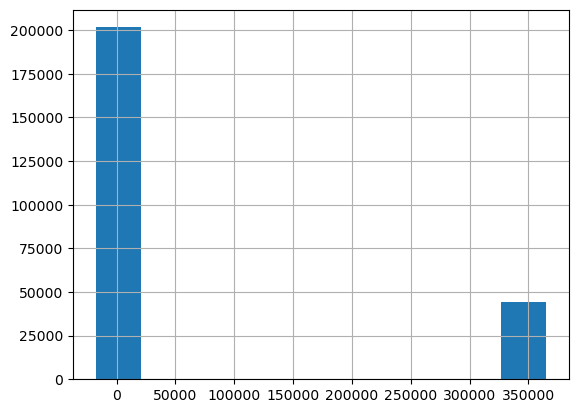

In [ ]:
application_train['DAYS_EMPLOYED'].hist()
plt.show()

In [ ]:
# check anomaly
anom = application_train[application_train["DAYS_EMPLOYED"] == 365243]
non_anom = application_train[application_train["DAYS_EMPLOYED"] != 365243]
print("Tỉ lệ phần trăm TARGET của non-anomalies: {}".format(100 *
      non_anom["TARGET"].mean()))
print("Tỉ lệ phần trăm TARGET của anomalies: {}".format(
    100 * anom["TARGET"].mean()))
print("Số lượng anomalies là {}".format(len(anom)))

Tỉ lệ phần trăm TARGET của non-anomalies: 8.66301410615564
Tỉ lệ phần trăm TARGET của anomalies: 5.4236982221821135
Số lượng anomalies là 44324


In [ ]:
def handling_days_employed(df_input, df_output):
    # Create an anomalous flag column
    df_output["DAYS_EMPLOYED_ANOM"] = (df_input["DAYS_EMPLOYED"] == 365243)

    # Replace the anomalous values with nan
    df_output["DAYS_EMPLOYED"] = df_input["DAYS_EMPLOYED"].replace({365243: np.nan})

    # Calculate years employed
    df_output["YEARS_EMPLOYED"] = df_output["DAYS_EMPLOYED"] / -365

    # percent employed over years of birth
    df_output['YEARS_EMPLOYED_PERCENT'] = df_output['YEARS_EMPLOYED'] / df_output['YEARS_BIRTH']

    return df_output


train_num_baseline = handling_days_employed(application_train, train_num_baseline)
test_num_baseline = handling_days_employed(application_test, test_num_baseline)

# Save Features

In [ ]:
%%time
def store_features(df_train, df_test, fname):
    print(df_train.shape, df_test.shape)
    fname = os.path.join("features_fullfill", "{}.pkl.bz2".format(fname))
    df_out = pd.concat([df_train, df_test]).reset_index(drop=True)
    df_out.to_pickle(fname, compression="bz2")
    print("Store features completed!")

store_features(train_cat_baseline, test_cat_baseline, "train_test_cat_fullfill_final")
store_features(train_num_baseline, test_num_baseline, "train_test_num_fullfill_ext_lr_final")

(246009, 82) (61502, 82)


Store features completed!
(246009, 87) (61502, 87)
Store features completed!
Wall time: 18.7 s


In [ ]:
# import pickle
# import bz2

# filename = "features_fullfill/train_test_cat.pkl.bz2"
# with bz2.open(filename, 'rb') as f:
#     df_out = pickle.load(f)

# print(df_out.shape)
# df_out